In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the Mexican real estate dataset
raw_data = pd.read_csv('properati_properties_Mexico.csv', index_col=0)

In [3]:
# Make a copy of the real estate dataset
real_estate = raw_data.copy()

# drop the id column
real_estate.drop('id', axis=1, inplace=True)

# the .head(10) function will show us the first 10 rows in our dataset
real_estate.head()

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
0,2015-01-05,rent,house,Morelos,|México|Morelos|,México,Morelos,18.824124,-98.948113,10000.0,MXN,11184.51,631.99,500.0,1.263980,NaN,NaN,NaN,LINDA CASA EN ZONA COMERCIAL IDEAL PARA OFICINAS
1,2015-01-05,rent,house,Morelos,|México|Morelos|,México,Morelos,18.825402,-98.946803,20000.0,MXN,22485.30,1270.55,480.0,2.646979,NaN,NaN,NaN,PRECIOSA CASA SOBRE AVENIDA IMPORTANTE
2,2015-01-05,rent,store,Morelos,|México|Morelos|,México,Morelos,18.823515,-98.949789,5000.0,MXN,5652.51,319.40,180.0,1.774444,NaN,NaN,NaN,INTERESANTE LOCAL EN RENTA FRENTE AL CANARIO
3,2015-01-05,rent,store,Tabasco,|México|Tabasco|,México,Tabasco,17.994583,-93.386271,8000.0,MXN,7586.83,428.70,528.0,0.811932,NaN,NaN,NaN,"Plaza Moro, Cardenas, Tabasco"
4,2015-02-22,rent,house,Querétaro,|México|Querétaro|,México,Querétaro,NaN,NaN,10000.0,MXN,11711.01,661.74,NaN,NaN,62.5,NaN,NaN,Casa en Renta en San Juan del Río


    We will drop some columns that are similar such as 'place_name', 'place_with_parent_names', 'country_name'. We also drop 'currency','price_aprox_local_currency', 'price_aprox_usd','price_usd_per_m2'.

In [4]:
# Informations about the dataset including number of columns, rows and dtype befroe cleaning
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396421 entries, 0 to 3396420
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   created_on                  object 
 1   operation                   object 
 2   property_type               object 
 3   place_name                  object 
 4   place_with_parent_names     object 
 5   country_name                object 
 6   state_name                  object 
 7   lat                         float64
 8   lon                         float64
 9   price                       float64
 10  currency                    object 
 11  price_aprox_local_currency  float64
 12  price_aprox_usd             float64
 13  surface_total_in_m2         float64
 14  price_usd_per_m2            float64
 15  price_per_m2                float64
 16  rooms                       float64
 17  expenses                    float64
 18  title                       object 
dtypes: float64(10), objec

    We have a total of 3396421 rows, 18 columns. We have two types of variables: object and float64. object can consist of both strings or mixed types (both numeric and non-numeric), and float64 are numbers with a floating point (ie. numbers with decimals).

    Since we have both continuous (float64) and categorical (object) variables in our real_estate, it might be informative to look at the number of unique values in each column using the nunique() function. 

In [5]:
real_estate.describe()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
count,2.480478e+06,2.480478e+06,3.358911e+06,3.358911e+06,3.358911e+06,1.702984e+06,1.226410e+06,2.802040e+06,114589.000000,2.257900e+04
mean,2.093369e+01,-9.876158e+01,2.643961e+06,3.266251e+06,1.787313e+05,4.488242e+02,7.536001e+02,1.621425e+04,2.865956,2.631509e+03
std,2.990206e+00,5.341055e+00,6.416914e+06,8.702311e+06,4.755819e+05,3.331339e+03,1.785712e+03,4.809894e+05,1.109116,2.711193e+04
min,-2.869301e+01,-1.316414e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.330000e+02,-6.998428e+04,3.972611e-06,1.000000,1.000000e+00
25%,1.922986e+01,-1.003984e+02,3.690000e+05,4.512499e+05,2.476366e+04,6.000000e+01,2.251490e+02,5.500000e+03,2.000000,3.500000e+02
50%,2.038247e+01,-9.924189e+01,1.390000e+06,1.555766e+06,8.505327e+04,1.550000e+02,5.408698e+02,1.036364e+04,3.000000,1.000000e+03
75%,2.112955e+01,-9.813249e+01,2.990000e+06,3.374615e+06,1.843313e+05,3.100000e+02,9.238062e+02,1.514899e+04,3.000000,2.600000e+03
max,8.998116e+01,1.052345e+02,9.500000e+08,9.452642e+08,4.954910e+07,2.000000e+05,3.706319e+05,1.995000e+08,28.000000,1.800000e+06


### Preliminary real_estate cleaning

In [ ]:
# quick check to see if we have any missing values from dframe.columns[:10]
# Areas with missing real_estate are highlited yellow.
plt.figure(figsize=(10,5))
cols = real_estate.columns
colors = ['#000099', '#ffff00']
sns.heatmap(real_estate[cols].isnull(), cmap=sns.color_palette(colors))
#sns.heatmap(real_estate[cols].isnull(), cmap=sns.color_palette("coolwarm", as_cmap=True))

In [6]:
# We need to first convert all the negatives values in the 'surface_total_in_m2' column to positive values
real_estate['surface_total_in_m2'] = abs(real_estate['surface_total_in_m2'])

# We will use .where() function replaces values equal to 0 with NaN values in the dataframe
real_estate = real_estate.where(real_estate != 0, np.nan)

In [7]:
# creating a function to check missing values
def missing_value(df):
    # count the number of missing values and the percentage of each column missing value
    missing_count = df.isna().sum()
    missing_percent = round(df.isna().mean() * 100, 3)

    # create a dataframe for the null values in the dataset
    missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['count_missing', 'percent_missing'])
    missing_data = missing_data[missing_data['count_missing'] > 0]

    return missing_data

# checking the missing values
missing_value(real_estate)

,count_missing,percent_missing
lat,915943,26.968
lon,915943,26.968
price,145617,4.287
currency,139660,4.112
price_aprox_local_currency,145617,4.287
price_aprox_usd,145617,4.287
surface_total_in_m2,2061309,60.691
price_usd_per_m2,2170050,63.892
price_per_m2,594381,17.500
rooms,3281832,96.626


In [8]:
# To conform the number of missing values in the dataset.
missing_values = real_estate.isna().sum().sum()
total_missing_percent = round(missing_values/len(real_estate), 2)
print(f'The number of missing values are {missing_values}. Which is {total_missing_percent}% of the total dataset. As a result, we will fix some of the missing values before dropping them.')

The number of missing values are 13889811. Which is 4.09% of the total dataset. As a result, we will fix some of the missing values before dropping them.


In [9]:
# change the created_on object to datetime object and create a year and month columns for timeseries analysis
real_estate['created_on'] = pd.to_datetime(real_estate.created_on)

# and renaming same of the features
real_estate = real_estate.rename(columns={'surface_total_in_m2':'total_surface_sqm2', 'state_name':'state'})

    Since price is one of our target, we will start by filling the missing values in the column based on individual state and property type.     we will fill in the missing surface values based on the per_price and price columns

In [10]:
# fill the missing values in the 'price' column based on individual state and property type
# Iterate over the categories in state_name and property_type
for cat1 in real_estate.state.unique():
    for cat2 in real_estate.property_type.unique():
        # Calculate the mean
        median = real_estate[(real_estate.state == cat1) & (real_estate.property_type == cat2)]['price'].median()

        # Fill the missing value with the mean
        real_estate.loc[(real_estate.state == cat1) & (real_estate.property_type == cat2) & real_estate['price'].isnull(), 'price'] = median

In [11]:
#we will divide the 'price' column by the 'price_per_m2' and fill the missing values in the 'total_surface_sqm2' column
real_estate['total_surface_sqm2'] = real_estate['price'] / real_estate['price_per_m2']

# we drop the per_price column using the drop method with axis=1
real_estate = real_estate.drop('price_per_m2', axis=1)

#### Create a seperate dataset for location and select few columns from the real_estate dataframe for further analysis

In [12]:
# create location dataset and select a few number of columns for the analysis
location_df = real_estate[[ 'state', 'operation', 'property_type', 'lat', 'lon', 'price']].copy()
location_df = location_df.dropna(subset=['lat', 'lon'])

# We created a copy of the dataframe and select a few number of columns for the analysis
real_estate = real_estate[['created_on', 'operation', 'state', 'property_type', 'total_surface_sqm2', 'price']].copy() #'year', 'month'

#### Visualization of the latitude and longitude on a scatter plot on top of a map

In [ ]:
# Create the map using Plotly Express
fig = px.scatter_mapbox(location_df, lat="lat", lon="lon", hover_name="state", hover_data=['operation', 'property_type', 'price'],
                        color='operation', height=600, zoom=4,
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15)

# Update the map layout
fig.update_layout(title="properati Maxico Property Map",
                  margin=dict(l=0, r=0, t=50, b=0),
                  mapbox=dict(style="open-street-map"))

# Show the map
#fig.show()

### Exploring their operations to further understand the dataset.

In [13]:
# relationships between rent and properties they sell
opts = real_estate['price'].groupby(real_estate['operation']) 
opts = opts.describe().rename_axis('stats')#.transpose()
opts

,count,mean,std,min,25%,50%,75%,max
stats,,,,,,,,
rent,633907.0,7.383311e+04,3.052647e+05,50.0,8000.0,15000.0,26000.0,4400000.0
sell,2762514.0,3.265020e+06,6.929051e+06,5000.0,980000.0,1890000.0,3500000.0,950000000.0


### Exploratory Data Analysis

In [14]:
# seaborn settings
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10, 10)})

#### OOP the run all plot all charts in the project.

In [15]:
# class to run charts for the categorical variable from dataframe  
class Plots():
    
    def __init__(self, data):
        
        self.data = data
        
    def pie_plot(self, col):
        #plt.figure(figsize=(10,10))
        #sns.set_style("whitegrid")    
        pie_chart = self.data.groupby(col).size()
            
        #define Seaborn color palette to use
        colors = sns.color_palette("flare")
        pie_chart.plot(kind = 'pie', ylabel = col, colors = colors, fontsize=16, autopct = '%.0f%%' )
        
    # function for bar plots
    
    def bar_plot(self, col):
        #sns.set_style('darkgrid')
        #sns.set(rc={'figure.figsize':(10, 8)})
        plot = sns.countplot(x=col, data= self.data, palette='seismic')
        # annotation text
        for p in plot.patches:
            plot.annotate(format(p.get_height(), '.2f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()),  
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points')
        
    # each property type given price at 95% confidence interval    
    def box_plot(self, col1, col2):
        sns.boxplot(x=col1, y=col2 , data=self.data, palette='hls', showfliers = False)       
        
    def diff_property_across_state(self, col, col1, col2):
        # property type by rent price per state 
        # Initialize the matplotlib figure
        f, ax = plt.subplots(figsize=(10, 15))

        # Load the example car crash dataset
        property_rent = self.data.sort_values(col, ascending=False)

        # Plot the total crashes
        sns.set_color_codes("pastel")
        sns.barplot(x= col, y= col1,hue= col2, data= property_rent, errorbar=None)


        # Add a legend and informative axis label
        ax.legend(ncol=2, loc="lower right", frameon=True)
        ax.set(ylabel="state", xlabel="rices of Different Property types")
        sns.despine(left=True, bottom=True)       
         
    # scatter plot for property type with respect to price and square m2      
    def scotter_plot(self, col1,col2,col3):
        rdf = self.data[self.data.surface_m2 > 100]
        sns.lmplot(
            data=rdf, x=col1, y=col2, col=col3, hue=col3,
            col_wrap=2, palette="muted", ci=None,
            height=4, scatter_kws={"s": 50, "alpha": 1}
        )
    
    # time series analysis for rent and selling properties    
    def line_plot(self):
        sns.relplot( data=real_estate, x="created_on", y="price", hue="operation", height=5, aspect=2.4, 
        kind="line" ).set( title="Rent vs Sell Property Prices", ylabel="Prices", xlabel='Date Created'
    )
        
    #  scatter plot for property type with respect to price and square m2    
    def mix_scatter_plot(self):

        # calculate linear correlation between two quantitative variables
        corr_mat = np.corrcoef(self.data['surface_m2'], self.data['price_usd'])
        res = corr_mat[0][1]

        # scatter plot with least square regression line
        # evaluate the linear relationship for insurance charges less than $15k

        # correlation

        r = np.corrcoef(self.data['surface_m2'], self.data['price_usd'])[0][1]
        b = r * (np.std(self.data['price_usd']) / np.std(self.data['surface_m2'])) # calculate slope
        a = np.mean(self.data['price_usd']) - b * np.mean(self.data['surface_m2']) # calculate intercept
        x = self.data['surface_m2'] #np.linspace(10,70) # regression line

        y = a + b * x

        fig, axes = plt.subplots(figsize=(10, 8))
        
        sns.scatterplot(ax = axes, data =self.data, x ='surface_m2',  y = 'price_usd', hue = 'property_type', palette="deep")
        axes.set_title(f'r = {round(res, 4)};   Surface_m2 and price Relationship')
        #axes.set_title('Surface_m2 and price Relationship') 
        axes.plot(x, y, '-r', label=f'price_usd={round(a,3)} + {round(b,3)}*surface_m2')
        axes.legend(loc='upper right')
        plt.xlabel('Surface_m2', color='#1C2833')
        plt.ylabel('Price_usd', color='#1C2833')
        
        plt.show()

In [16]:
charts = Plots(real_estate)

#### Pie chart showing Rent and Sell peårcentage share

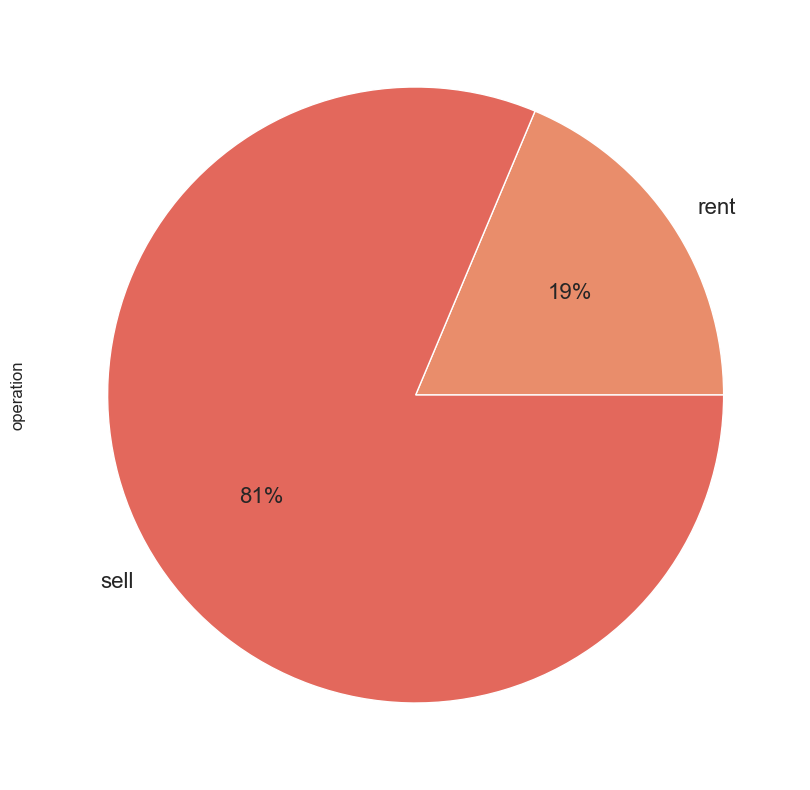

In [17]:
# pie chart for different operations
charts.pie_plot('operation')

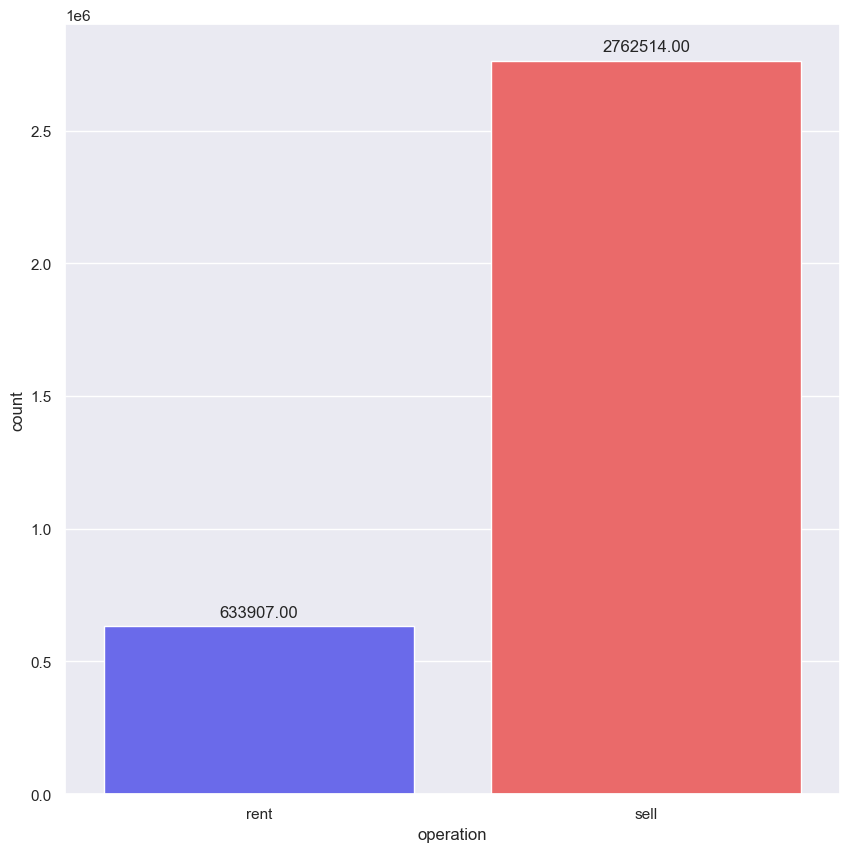

In [18]:
# Bar chart for different operations
charts.bar_plot('operation')

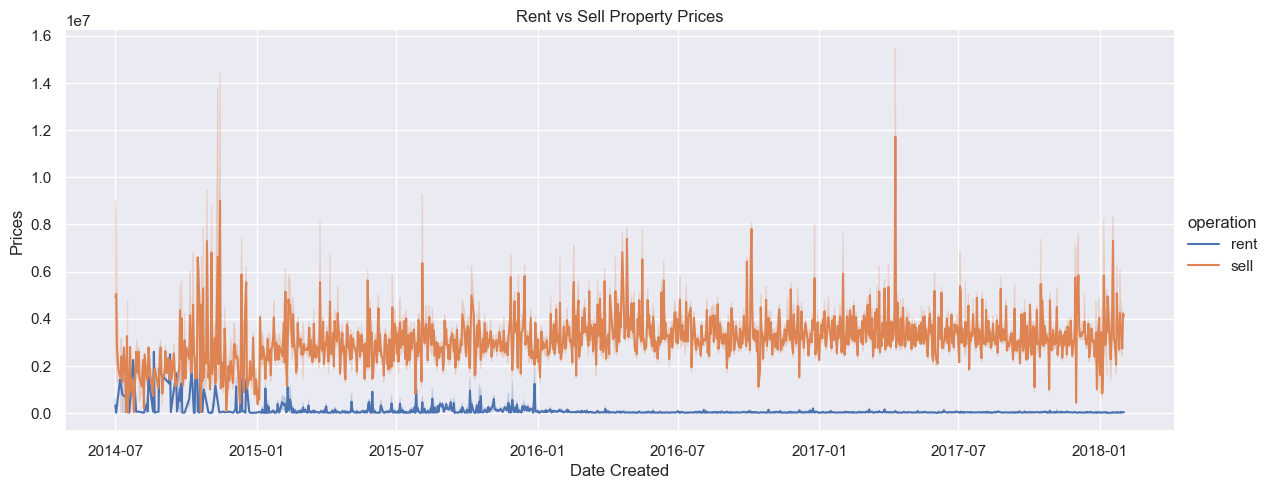

In [17]:
# line chart to analyse the trends of both operations
charts.line_plot()

    From the charts above, the number of properties they sell has 82% share while the rented properties are 18%. It implies that they sell more of their properties.  The properties they are selling have been trending upward since January 2015 with some spikes here and there. Asides from a few spikes, the rented properties have been on a downward trend since July 2014.

### Analysing each property across the states in Mexico

In [18]:
## split the Housing dataset into 'rent' and 'sell'
rent_df = real_estate[real_estate.operation == 'rent']

# Housing in Mexico for sell
sell_df = real_estate[real_estate.operation == 'sell']

### Define a function to check for outliers function 

In [41]:
### Define a function to check for outliers function 
def outliers(df): # check for outliers using IQR method
    q1 = df['price'].quantile(0.25)
    q3 = df['price'].quantile(0.75)
    iqr = q3 - q1

    # calculate the lower and upper bounds for each variable
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # check all the values outside the range for each variable
    outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]['price']

    # print out the list of outliers for each variable
    print('The data points that fell outside the whiskers are ' + str(outliers.count()) + ' outliers')

In [42]:
# Rent dataframe
outliers(rent_df)

# Sell dataframe
outliers(sell_df)

The data points that fell outside the whiskers are 62396 outliers
The data points that fell outside the whiskers are 254026 outliers


# function to run the top cities with higher rental and selling rates

In [19]:
# function to run the top 10 cities with higher rental rates
class StateProperty():
    def __init__(self, rent, sell):
        self.rent = rent
        self.sell = sell
        #self.col = col
    
    def property(self, r):
    
        rent = self.rent[self.rent.property_type == r].groupby('state')['price']
        rent = rent.mean().sort_values(ascending=False).head(7)    
            
        sell = self.sell[self.sell.property_type == r].groupby('state')['price']
        sell = sell.mean().sort_values(ascending=False).head(7)  
            
        plt.figure(1)
        
        plt.subplot(211)
        plt.title(f'Top Five State with Higher {r.capitalize()}s for Rent')
        rent.plot(kind = 'bar', rot = 0, colormap = 'Pastel1')

        
        plt.subplot(212)
        plt.title( f'Top Five State with Higher Cost of {r.capitalize()}s - Selling Properties') 
        sell.plot(kind = 'bar', rot = 0, colormap = 'Paired')
        
        plt.tight_layout()    
        plt.show()

In [20]:
# create rent dataframe for analysis and use class function to call
ranking = StateProperty(rent_df, sell_df)

#### Call the charts class

In [21]:
# call the charts class
sell_charts = Plots(sell_df)

# call the charts class
rent_charts = Plots(rent_df)

### Properties on Rent Exploration

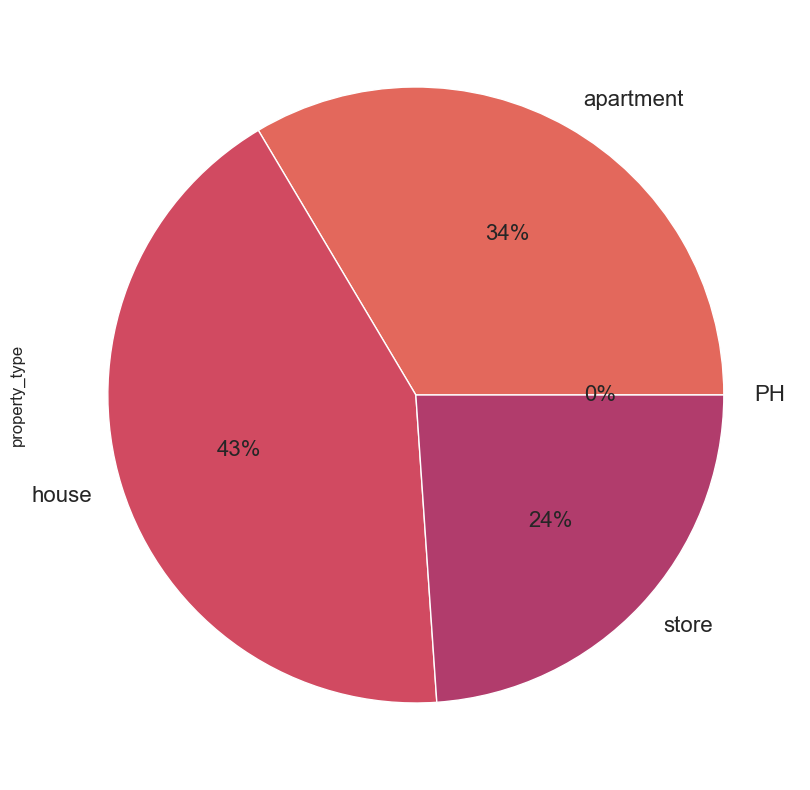

In [43]:
# Pie chart showing different shares of rental property types
rent_charts.pie_plot('property_type')

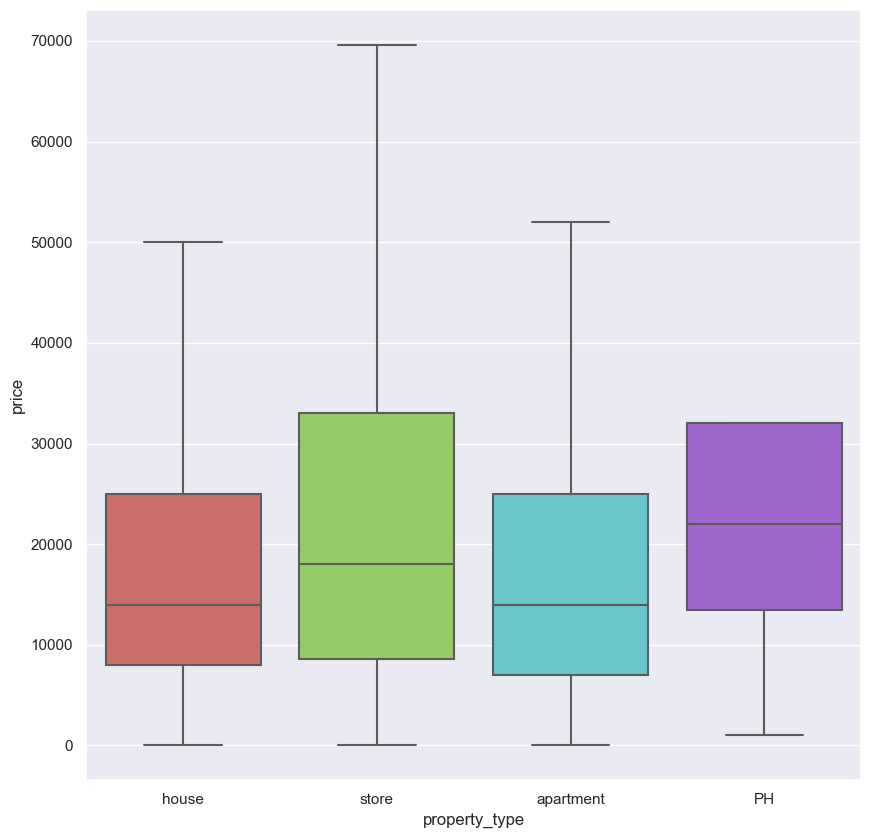

In [44]:
# box plot showing different states rental property types
rent_charts.box_plot('property_type', 'price')

In [50]:
#charts.diff_property_across_state("price_usd",'states','property_type')
# Combinations of property types they rent per state.
#rent_charts.diff_property_across_state("price",'state','property_type')

### Properties on Sale Exploration

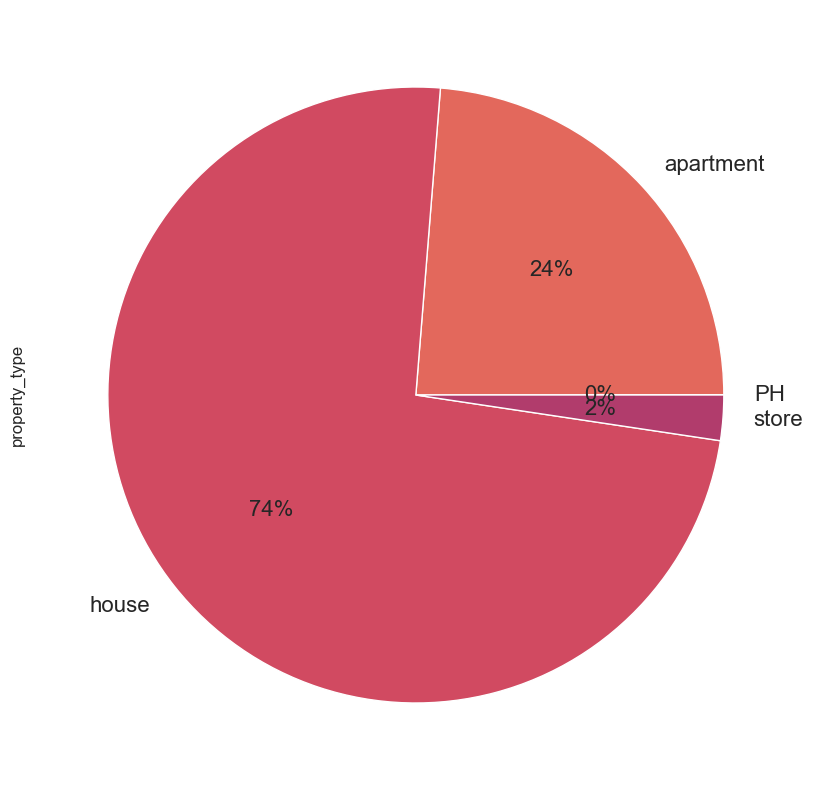

In [51]:
# Pie chart showing different shares of selling property types
sell_charts.pie_plot('property_type')

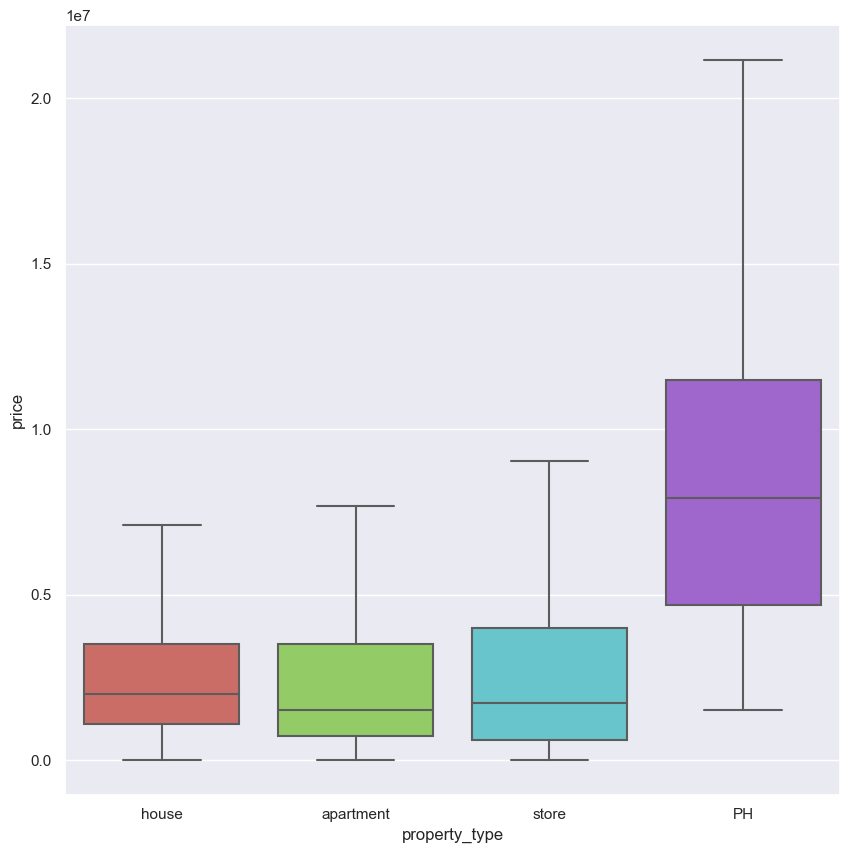

In [52]:
# box plot showing different states selling property types
sell_charts.box_plot('property_type', 'price')

    From the above chart, the houses seems to have a larger share of the pie with 43% compare to the rest. It is closely followed by appartment with 34% and store 24%. Penthouse doesn't seem to doing well in the property market.

### Analysing The different property types across states with respect to price...

#### HOUSES

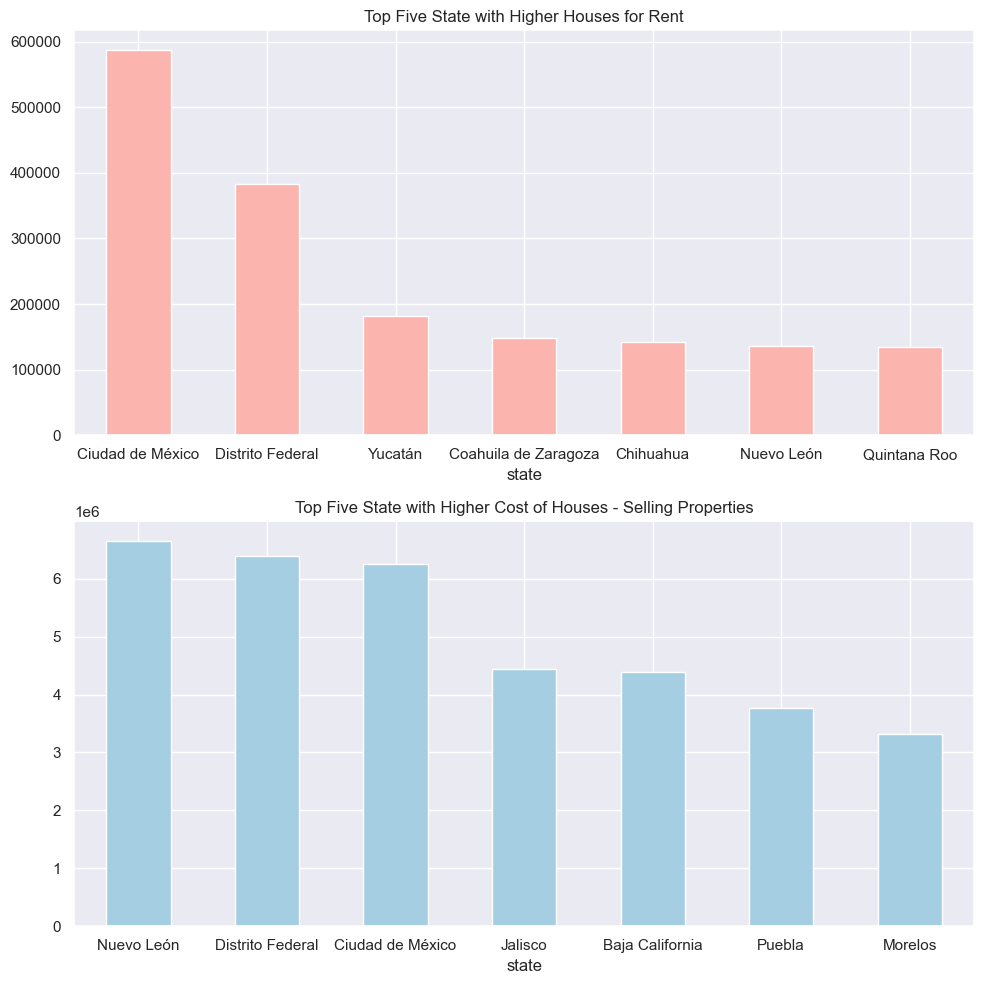

In [53]:
# top ten store with higher price in Mexico
ranking.property('house') 

    The top three properties with higher property prices are Nuevo Leon, Distrito Federal, and Ciudad de Mexico.  While the top two states with high rental property prices are Ciudad de Mexico and Distrito Federal.
    
    Investors interested in both selling and renting houses can buy properties in these two states Ciudad de Mexico and Distrito Federal.

#### STORES

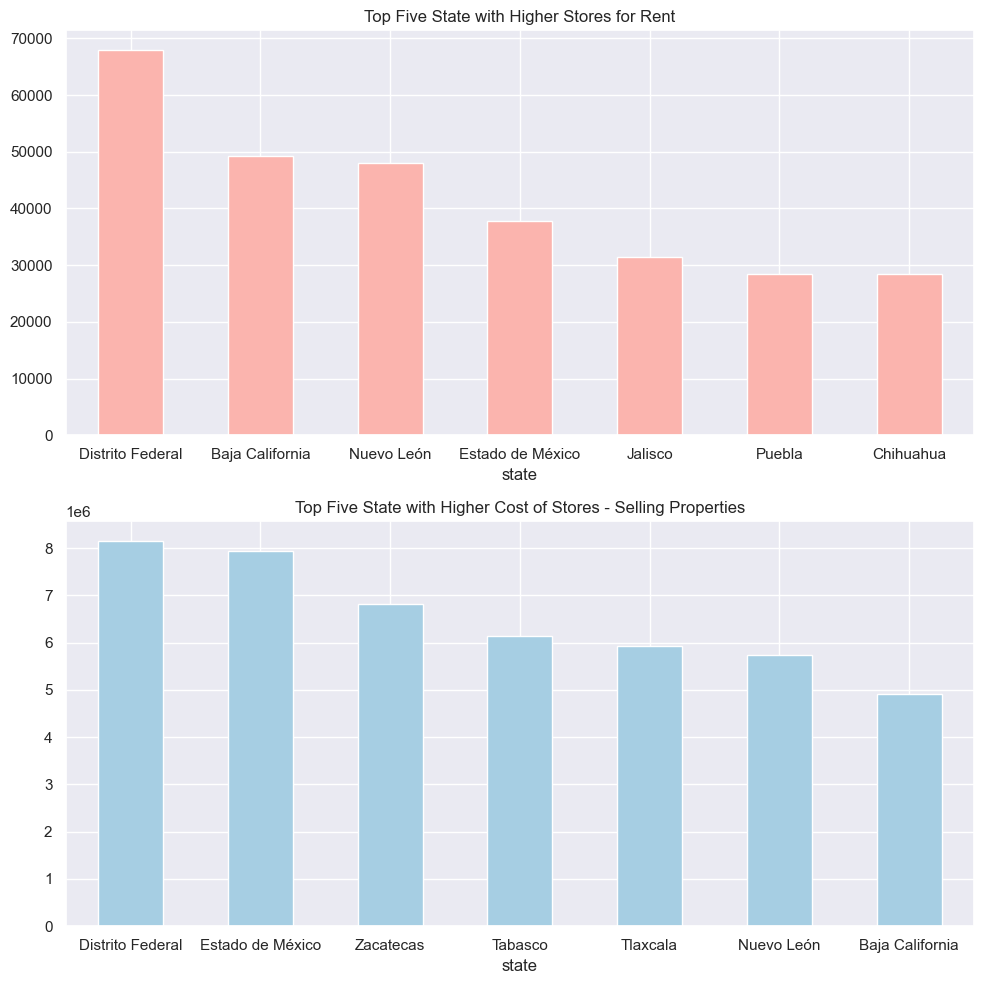

In [54]:
# top ten store with higher price in Mexico
ranking.property('store') 

    The top state with higher store price is Distrito Federal.  While the top two states with high rental property prices are Distrito Federal and Estado de Mexico.

#### APARTMENTS

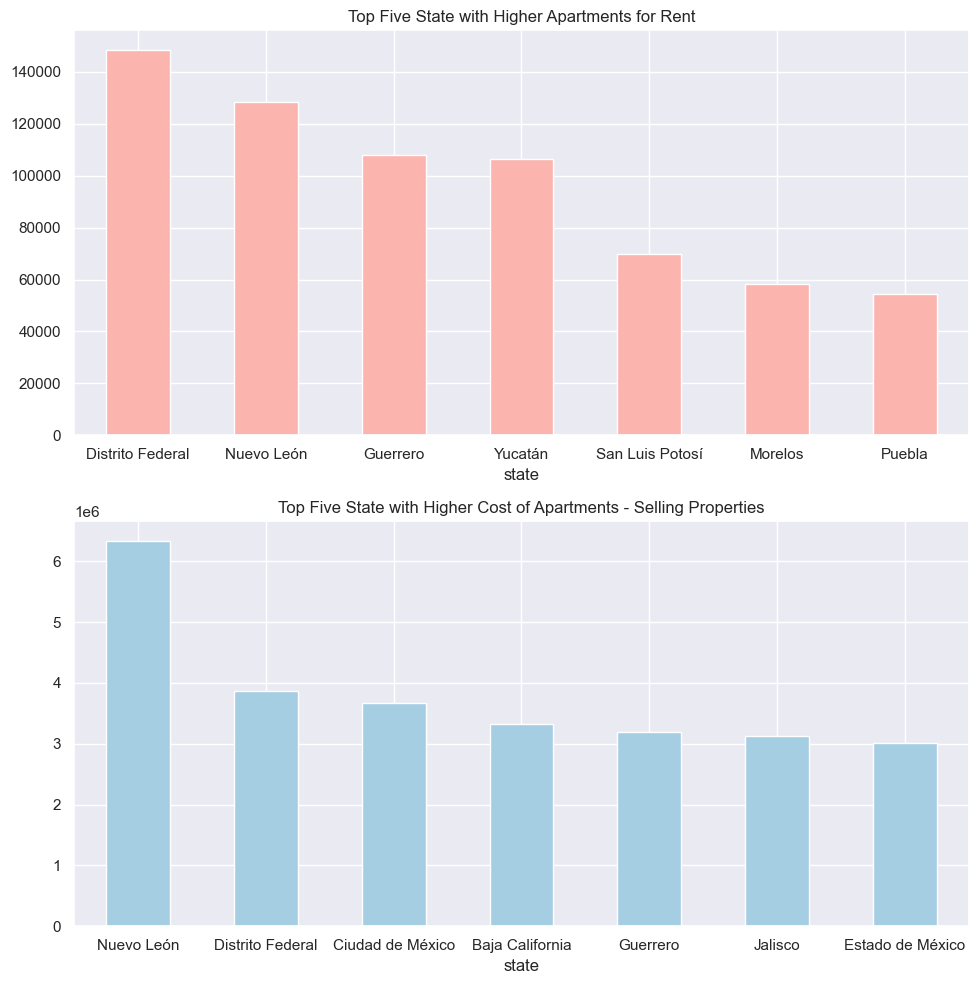

In [55]:
# top ten HOUSES with higher price in Mexico
ranking.property('apartment') 

#### PENTHOUSES

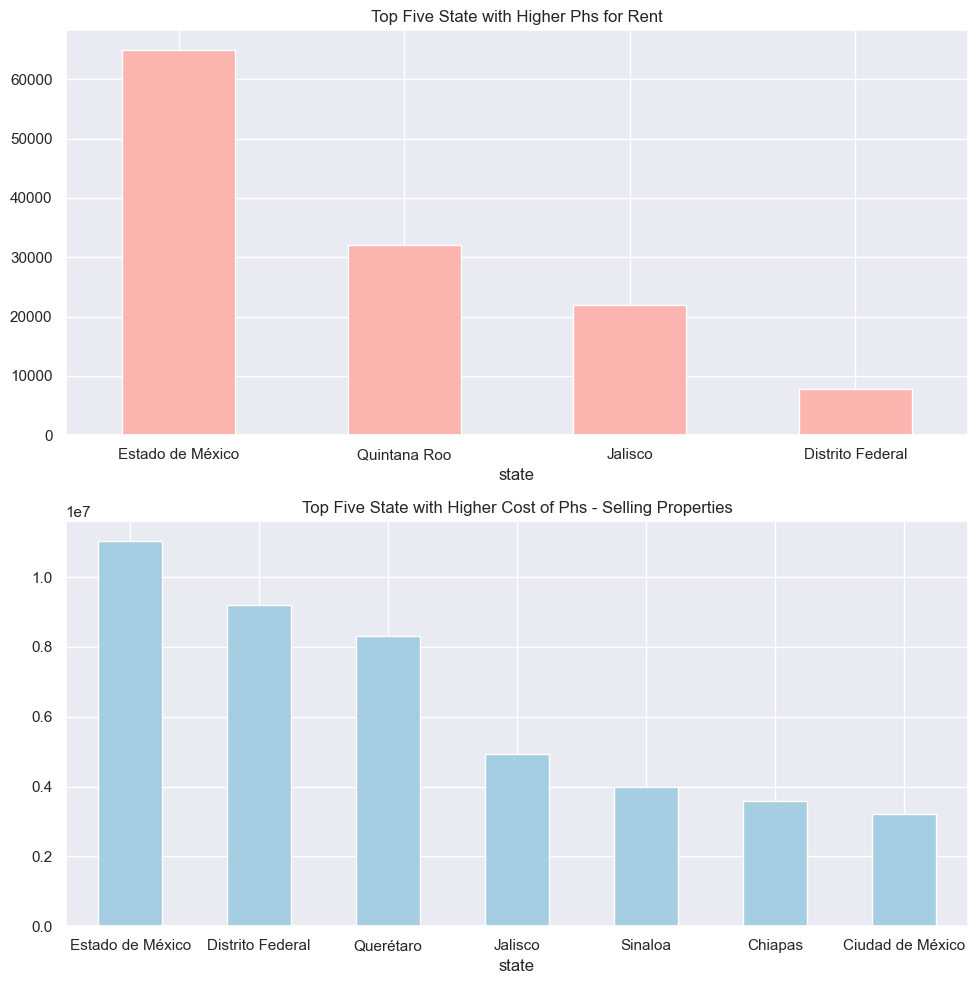

In [56]:
# top ten HOUSES with higher price in Mexico
ranking.property('PH') 

------